# Flight Price Prediction

### Problem Statement

We can build an ML model to predict flight ticket prices using a dataset. The dataset contains prices for different airlines and cities from March to June 2019, with a training set of 10,683 records and a test set of 2,671 records. This model can help travelers make informed decisions about their travel and assist airlines in adjusting their pricing strategies to maximize revenue and remain competitive.

- Size of training set: 10683 records
- Size of test set: 2671 records
- Link of the dataset:- https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

file_path = 'Data_Train.xlsx'

os.path.exists(file_path)



True

### Loading the Flight Fare Data

In [3]:
Train_data = pd.read_excel("Data_Train.xlsx")

Train_data.shape

(10683, 11)

In [4]:
Train_data["Airline"].value_counts()

Airline
Jet_Airways                          3849
IndiGo                               2053
Air_India                            1752
Multiple_carriers                    1196
SpiceJet                              818
Vistara                               479
Air_Asia                              319
GoAir                                 194
Multiple_carriers_Premium_economy      13
Jet_Airways Business                    6
Vistara_Premium_economy                 3
Trujet                                  1
Name: count, dtype: int64

In [5]:
Test_data=pd.read_excel("Test_set.xlsx")
Test_data.shape

(2671, 10)

In [6]:
Test_data["Airline"].value_counts()

Airline
Jet_Airways                          897
IndiGo                               511
Air_India                            440
Multiple_carriers                    347
SpiceJet                             208
Vistara                              129
Air_Asia                              86
GoAir                                 46
Multiple_carriers_Premium_economy      3
Vistara_Premium_economy                2
Jet_Airways Business                   2
Name: count, dtype: int64

In [7]:
df = pd.concat([Train_data, Test_data], ignore_index=True)

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New_Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air_India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet_Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New_Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air_India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet_Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air_India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


### Data Inspection

#### Shape of the dataset

In [9]:
df.shape

(13354, 11)

#### Summary of the dataset


In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Since this dataset has only 1 numercial column, describe() will display summary statistics only for the "Price" column.

In [11]:
#information about the data, checking datatypes
df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [12]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### Exploratory Data Analysis (EDA)

#### Bar chart showing top 10 most preferred Airlines

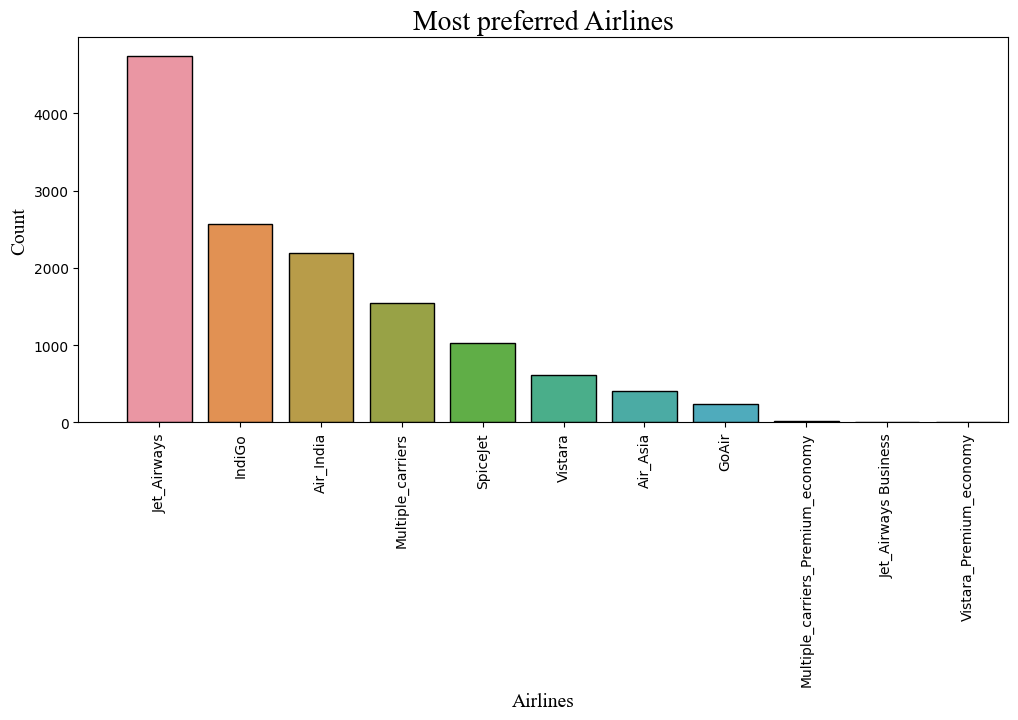

In [13]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Create the countplot
ax = sns.countplot(x="Airline", data=df, order=df['Airline'].value_counts().index, ec="black")

# Set the title and axis labels
ax.set_title("Most preferred Airlines", fontdict={'family': 'times new roman', 'size': 20, 'color': 'black'})
ax.set_xlabel("Airlines", fontdict={'family': 'times new roman', 'size': 14, 'color': 'black'})
ax.set_ylabel("Count", fontdict={'family': 'times new roman', 'size': 14, 'color': 'black'})

# Rotate x-axis tick labels
plt.xticks(rotation=90)

# Set the x-axis limits
plt.xlim(-1, 10.5)

# Display the plot
plt.show()

##### Insights
- Most preferred Airline is "Jet Airways"
- From all the total flight tickets sold, Jet Airways has the highest share followed by Indigo.

#### Airlines Vs Flight ticket Price

In [14]:
airlines_df = df.groupby('Airline')['Price'].max().nlargest(10).reset_index(name='Max Price')
airlines_df

,Airline,Max Price
0,Jet_Airways Business,79512.0
1,Jet_Airways,54826.0
2,Multiple_carriers,36983.0
3,Air_India,31945.0
4,SpiceJet,23267.0
5,GoAir,22794.0
6,IndiGo,22153.0
7,Vistara,21730.0
8,Multiple_carriers_Premium_economy,14629.0
9,Air_Asia,13774.0


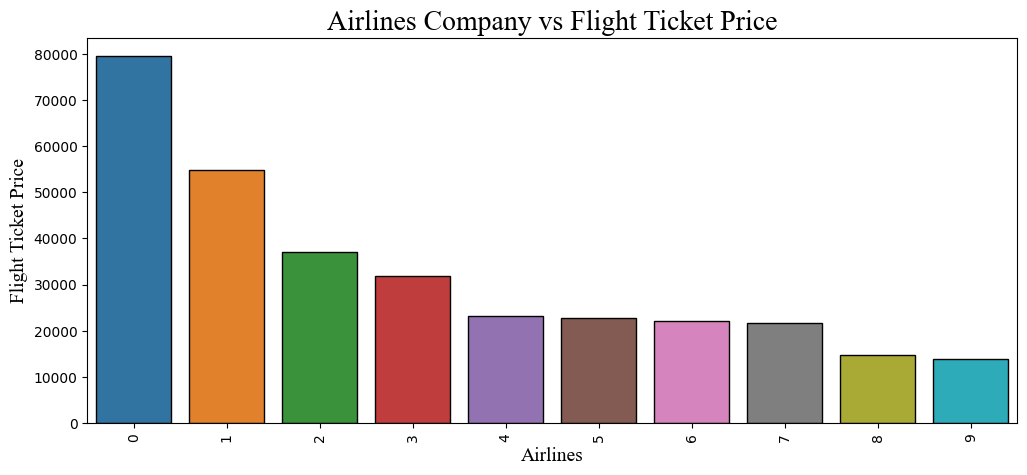

In [15]:
# Create a bar plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=airlines_df.index, y=airlines_df["Max Price"], ec="black")

# Set the title and axis labels
ax.set_title("Airlines Company vs Flight Ticket Price", fontdict={'family': 'times new roman', 'size': 20, 'color': 'black'})
ax.set_xlabel("Airlines", fontdict={'family': 'times new roman', 'size': 14, 'color': 'black'})
ax.set_ylabel("Flight Ticket Price", fontdict={'family': 'times new roman', 'size': 14, 'color': 'black'})

# Rotate x-axis tick labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


##### Insights
- "Jet Airways Business" tickets are the most expensive ones.

#### Price on Weekdays vs Weekends

In [16]:
# Create a new DataFrame 'days_df' containing selected columns from 'df'
days_df = df[['Airline', 'Date_of_Journey', 'Price']].copy()

# Display the first few rows of 'days_df'
days_df.head()


,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897.0
1,Air_India,1/05/2019,7662.0
2,Jet_Airways,9/06/2019,13882.0
3,IndiGo,12/05/2019,6218.0
4,IndiGo,01/03/2019,13302.0


In [17]:
# Convert the 'Date_of_Journey' column to datetime format using the specified format
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'], format='%d/%m/%Y')

# Extract the weekday name from the 'Date_of_Journey' column and assign it to the 'Weekday' column
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()

# Create a new column 'Weekend' and assign 1 if the day is Sunday, else assign 0
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)

# Display the first few rows of the DataFrame
days_df.head()


,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897.0,Sunday,1
1,Air_India,2019-05-01,7662.0,Wednesday,0
2,Jet_Airways,2019-06-09,13882.0,Sunday,1
3,IndiGo,2019-05-12,6218.0,Sunday,1
4,IndiGo,2019-03-01,13302.0,Friday,0


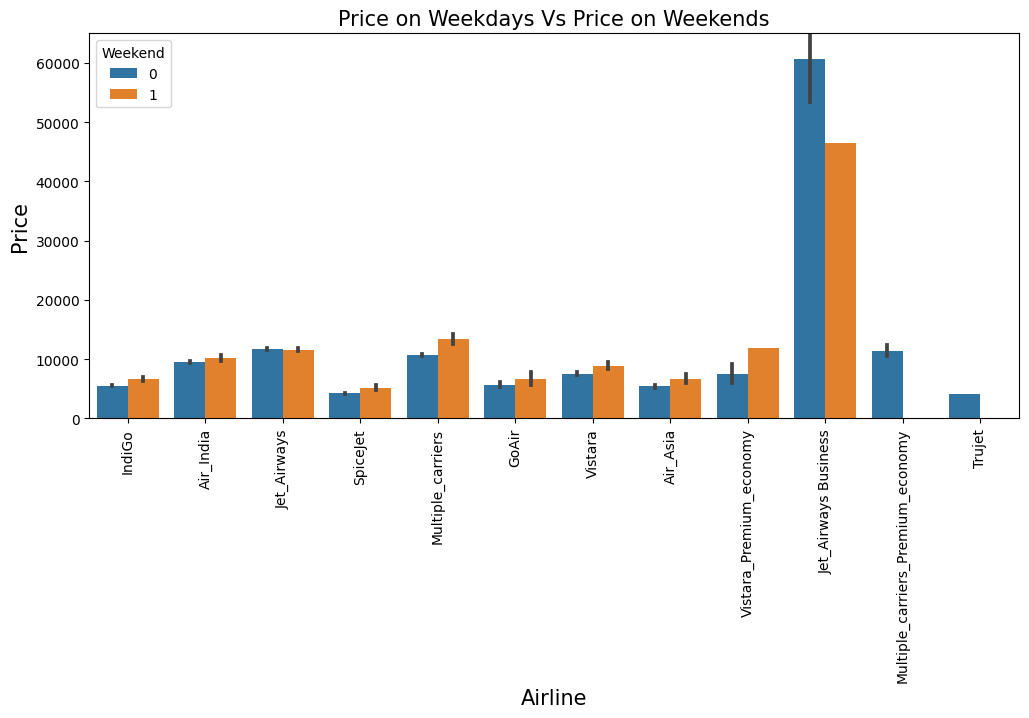

In [18]:
# Set the figure size
plt.subplots(figsize=(12, 5))

# Create a bar plot
sns.barplot(data=days_df, x='Airline', y='Price', hue='Weekend')

# Set the x-axis label and rotate the tick labels
plt.xlabel("Airline", size=15)
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel("Price", size=15)

# Set the title of the plot
plt.title("Price on Weekdays Vs Price on Weekends", size=15)

# Add a legend with a title
plt.legend(title='Weekend'.title())

# Set the y-axis limits
plt.ylim(0, 65000)

# Display the plot
plt.show()


##### Insights
- The Price of tickets is higher on Weekends.

### Feature Engineering

In [19]:
# Extact day, month, year from Date_of_Journey feature and store them in new columns. 

df["Journey_date"]=df["Date_of_Journey"].str.split("/").str[0].astype(int)
df["Journey_month"]=df["Date_of_Journey"].str.split("/").str[1].astype(int)
df["Journey_year"]=df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [20]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New_Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air_India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet_Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New_Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air_India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
13351,Jet_Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019
13352,Air_India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New_Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air_India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet_Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New_Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [22]:
# Now Date_of_Journey column is no longer required, so we can drop it.

df=df.drop(["Date_of_Journey"],axis=1)

In [23]:
df["Journey_year"].value_counts()

Journey_year
2019    13354
Name: count, dtype: int64

In [24]:
# Since Journey_year is the same ("2019") for all rows, we can drop it.

df=df.drop(["Journey_year"],axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New_Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air_India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet_Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New_Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


In [25]:
# Total_Stops 

df["Total_Stops"]=df["Total_Stops"].str.split(" ").str[0]
df["Total_Stops"]=df["Total_Stops"].replace("non-stop","0")
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New_Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3
1,Air_India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5
2,Jet_Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5
4,IndiGo,Banglore,New_Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3


In [26]:
# Extracting hours and min from Arrival time, Departure time

# Arrival_Time
df["Arrival_Time"]=df["Arrival_Time"].str.split(" ").str[0]
df['Arrival_hour']=df["Arrival_Time"].str.split(':').str[0].astype(int)
df['Arrival_min']=df["Arrival_Time"].str.split(':').str[1].astype(int)
df=df.drop(["Arrival_Time"],axis=1)

# Dep_Time
df['Dep_hour']=df["Dep_Time"].str.split(':').str[0].astype(int)
df['Dep_min']=df["Dep_Time"].str.split(':').str[1].astype(int)
df=df.drop(["Dep_Time"],axis=1)

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New_Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,1,10,22,20
1,Air_India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,13,15,5,50
2,Jet_Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New_Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,21,35,16,50


#### Route column

- The route column tells about the journey's path.
- Route column can be removed because 'Total_Stops' field has already captured this value and both are related.
-  'Additional_Info' column can be dropped since more than 70% of them have no information.

In [27]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

#### Duration column
- Extract hours and min from Duration feature.
- Convert hours to min and find total duration in minutes to make it a single column.

In [28]:
df["Duration_hr"]=df["Duration"].str.split(' ').str[0].str.split('h').str[0]

In [29]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,IndiGo,Banglore,New_Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2
1,Air_India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7
2,Jet_Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5
4,IndiGo,Banglore,New_Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4


In [30]:
df["Duration_min"]=df["Duration"].str.split(' ').str[1].str.split('m').str[0]

In [31]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New_Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air_India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet_Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New_Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [32]:
df['Duration_min'].fillna("0",inplace=True)

In [33]:
df['Duration_hr'].str.contains('h').sum()

0

In [34]:
df['Duration_hr'].str.contains('m').sum()

2

In [35]:
df['Duration_min'].str.contains('h').sum()

0

In [36]:
df['Duration_min'].str.contains('m').sum()

0

In [37]:
df[df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air_India,Mumbai,Hyderabad,5m,2,17327.0,6,3,16,55,16,50,5m,0
13343,Air_India,Mumbai,Hyderabad,5m,2,NaN,12,3,16,55,16,50,5m,0


In [38]:
df.loc[[6474, 2660], 'Duration_min'] = df.loc[[6474, 2660], 'Duration_hr']
df.loc[df['Duration_min'] == '5m', 'Duration_min'] = 5

In [39]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New_Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air_India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet_Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New_Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [40]:
df.loc[[6474, 2660]]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air_India,Mumbai,Hyderabad,5m,2,17327.0,6,3,16,55,16,50,5m,5
2660,Jet_Airways,Delhi,Cochin,27h,2,13292.0,12,6,12,35,9,35,27,27


In [41]:
df["Duration_hr"]=df["Duration_hr"].replace("5m","0")

In [42]:
df['Duration_hr'].str.contains('m').sum()

0

In [43]:
df[df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min


In [44]:
df["Duration_hr"] = df["Duration_hr"].astype(int)

In [45]:
df["Duration_min"] = df["Duration_min"].astype(int)

In [46]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New_Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air_India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet_Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New_Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [47]:
df["Duration"] = (df["Duration_hr"]*60) + df["Duration_min"]
df=df.drop(['Duration_hr','Duration_min'],axis=1)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New_Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air_India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet_Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New_Delhi,285,1,13302.0,1,3,21,35,16,50


In [48]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = pd.get_dummies(df['Airline']).astype(int)

Airline.head()

,Air_Asia,Air_India,GoAir,IndiGo,Jet_Airways,Jet_Airways Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [49]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding


df = pd.get_dummies(df, columns=["Destination", "Source"]) # one hot encoding
df = df.apply(lambda x: x.astype(int) if x.dtype == bool else x)
df.drop(["Airline"], axis = 1, inplace = True)


df.head()

,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,170,0,3897.0,24,3,1,10,22,20,0,0,0,0,0,1,1,0,0,0,0
1,445,2,7662.0,1,5,13,15,5,50,1,0,0,0,0,0,0,0,0,1,0
2,1140,2,13882.0,9,6,4,25,9,25,0,1,0,0,0,0,0,0,1,0,0
3,325,1,6218.0,12,5,23,30,18,5,1,0,0,0,0,0,0,0,0,1,0
4,285,1,13302.0,1,3,21,35,16,50,0,0,0,0,0,1,1,0,0,0,0


In [50]:
df = pd.concat([df, Airline], axis = 1)
df

,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Destination_Banglore,...,GoAir,IndiGo,Jet_Airways,Jet_Airways Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy
0,170,0,3897.0,24,3,1,10,22,20,0,...,0,1,0,0,0,0,0,0,0,0
1,445,2,7662.0,1,5,13,15,5,50,1,...,0,0,0,0,0,0,0,0,0,0
2,1140,2,13882.0,9,6,4,25,9,25,0,...,0,0,1,0,0,0,0,0,0,0
3,325,1,6218.0,12,5,23,30,18,5,1,...,0,1,0,0,0,0,0,0,0,0
4,285,1,13302.0,1,3,21,35,16,50,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1435,1,NaN,6,6,20,25,20,30,1,...,0,0,0,0,0,0,0,0,0,0
13350,155,0,NaN,27,3,16,55,14,20,1,...,0,1,0,0,0,0,0,0,0,0
13351,395,1,NaN,6,3,4,25,21,50,0,...,0,0,1,0,0,0,0,0,0,0
13352,915,1,NaN,6,3,19,15,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_date', 'Journey_month',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New_Delhi',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Air_Asia', 'Air_India', 'GoAir', 'IndiGo',
       'Jet_Airways', 'Jet_Airways Business', 'Multiple_carriers',
       'Multiple_carriers_Premium_economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara_Premium_economy'],
      dtype='object')

In [52]:
df

,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Destination_Banglore,...,GoAir,IndiGo,Jet_Airways,Jet_Airways Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy
0,170,0,3897.0,24,3,1,10,22,20,0,...,0,1,0,0,0,0,0,0,0,0
1,445,2,7662.0,1,5,13,15,5,50,1,...,0,0,0,0,0,0,0,0,0,0
2,1140,2,13882.0,9,6,4,25,9,25,0,...,0,0,1,0,0,0,0,0,0,0
3,325,1,6218.0,12,5,23,30,18,5,1,...,0,1,0,0,0,0,0,0,0,0
4,285,1,13302.0,1,3,21,35,16,50,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1435,1,NaN,6,6,20,25,20,30,1,...,0,0,0,0,0,0,0,0,0,0
13350,155,0,NaN,27,3,16,55,14,20,1,...,0,1,0,0,0,0,0,0,0,0
13351,395,1,NaN,6,3,4,25,21,50,0,...,0,0,1,0,0,0,0,0,0,0
13352,915,1,NaN,6,3,19,15,4,0,0,...,0,0,0,0,0,0,0,0,0,0


### Checking for null values

In [53]:
df

,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Destination_Banglore,...,GoAir,IndiGo,Jet_Airways,Jet_Airways Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy
0,170,0,3897.0,24,3,1,10,22,20,0,...,0,1,0,0,0,0,0,0,0,0
1,445,2,7662.0,1,5,13,15,5,50,1,...,0,0,0,0,0,0,0,0,0,0
2,1140,2,13882.0,9,6,4,25,9,25,0,...,0,0,1,0,0,0,0,0,0,0
3,325,1,6218.0,12,5,23,30,18,5,1,...,0,1,0,0,0,0,0,0,0,0
4,285,1,13302.0,1,3,21,35,16,50,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1435,1,NaN,6,6,20,25,20,30,1,...,0,0,0,0,0,0,0,0,0,0
13350,155,0,NaN,27,3,16,55,14,20,1,...,0,1,0,0,0,0,0,0,0,0
13351,395,1,NaN,6,3,4,25,21,50,0,...,0,0,1,0,0,0,0,0,0,0
13352,915,1,NaN,6,3,19,15,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.isnull().sum()

Duration                                0
Total_Stops                             1
Price                                2671
Journey_date                            0
Journey_month                           0
Arrival_hour                            0
Arrival_min                             0
Dep_hour                                0
Dep_min                                 0
Destination_Banglore                    0
Destination_Cochin                      0
Destination_Delhi                       0
Destination_Hyderabad                   0
Destination_Kolkata                     0
Destination_New_Delhi                   0
Source_Banglore                         0
Source_Chennai                          0
Source_Delhi                            0
Source_Kolkata                          0
Source_Mumbai                           0
Air_Asia                                0
Air_India                               0
GoAir                                   0
IndiGo                            

In [55]:
# Price column has null values. Fill it with mean value
df["Price"].fillna(df["Price"].mean(),inplace=True)

In [56]:
df["Total_Stops"] = df["Total_Stops"].fillna(0)

In [57]:
df.isnull().sum()

Duration                             0
Total_Stops                          0
Price                                0
Journey_date                         0
Journey_month                        0
Arrival_hour                         0
Arrival_min                          0
Dep_hour                             0
Dep_min                              0
Destination_Banglore                 0
Destination_Cochin                   0
Destination_Delhi                    0
Destination_Hyderabad                0
Destination_Kolkata                  0
Destination_New_Delhi                0
Source_Banglore                      0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Air_Asia                             0
Air_India                            0
GoAir                                0
IndiGo                               0
Jet_Airways                          0
Jet_Airways Business     

### Using Encoding to Handle categorical data
##### Features with Categorical data
- Airline
- Source
- Destination

Apply Label Encoder to these features.    

### Feature Selection

- Finding out the best feature which will contribute and have good relation with the target variable(Price).
- Let's use heat map to find correlation between features.

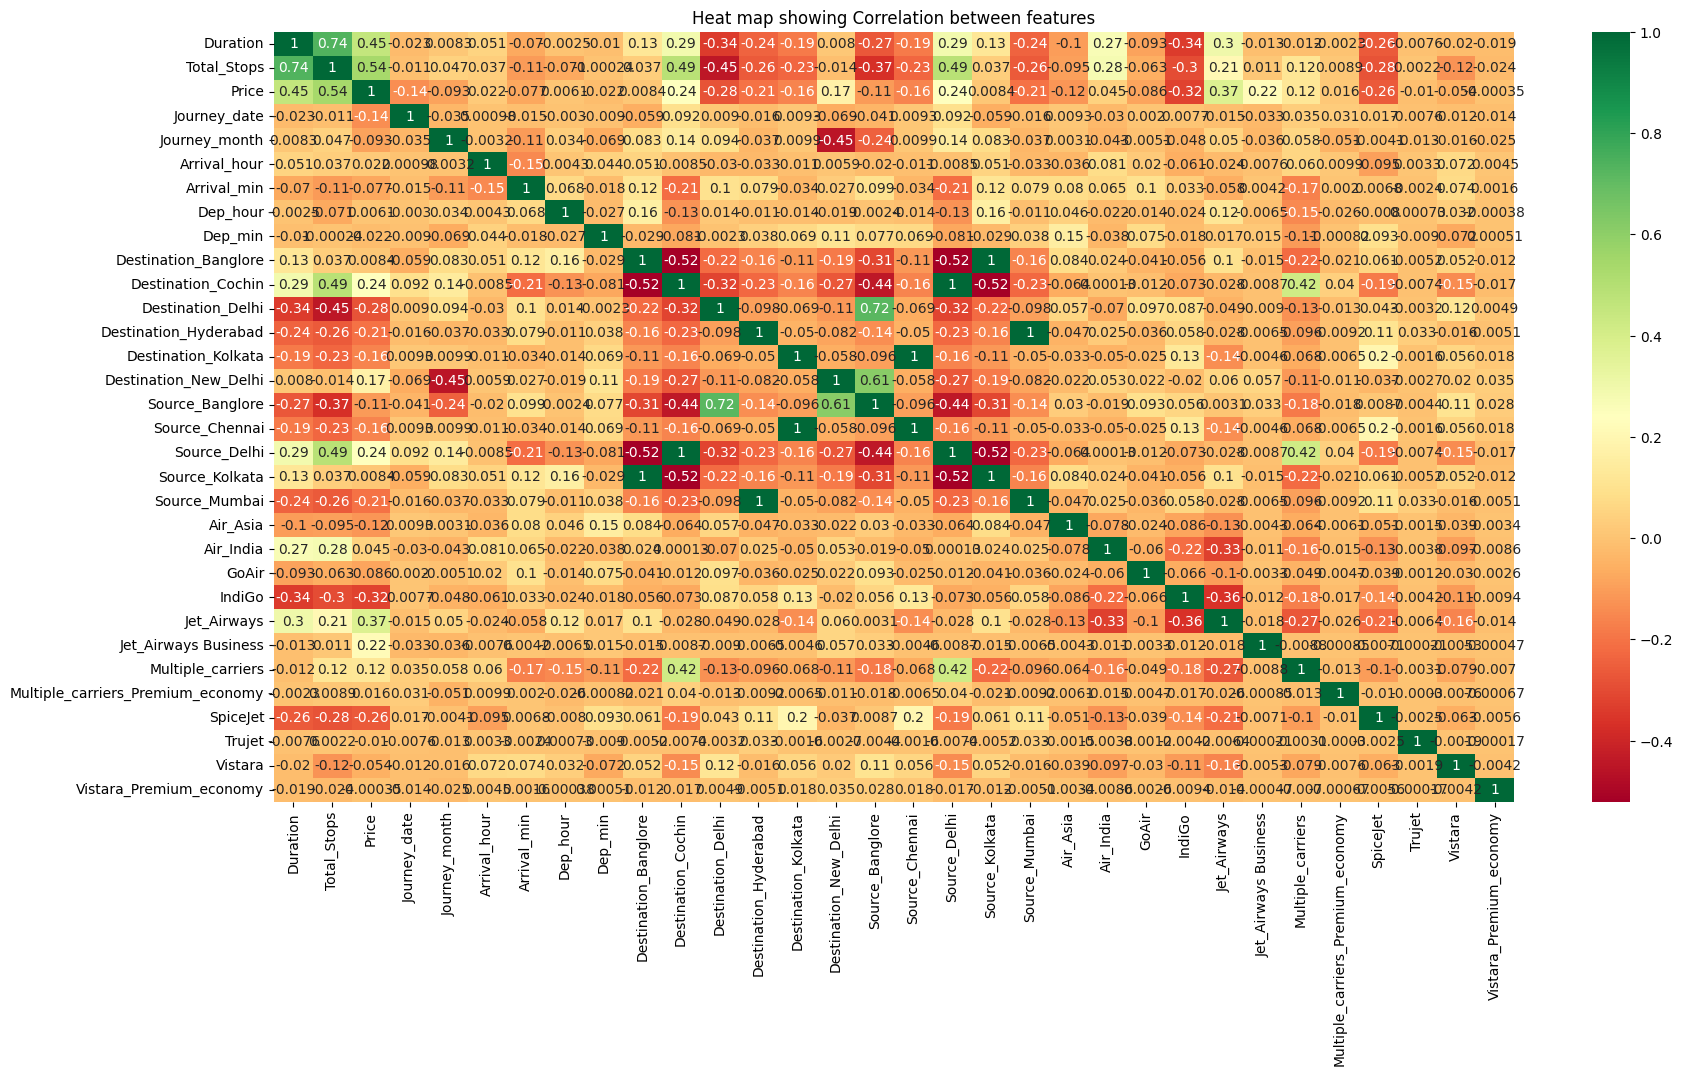

In [58]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")

plt.show()

#### There is a high correlation between:
- Price & Total Stops
- Price & flight duration
- Duration & Total stops

### Building Machine Learning models

For predicting the Price, we build 3 models using the following algorithms: 
- K neighnors regressor
- Decision Tree regressor
- Random Forest Regressor

Compare the accuracies got from these 3 models and select the best model.
Apply hyperparameter tuning to increase its efficiency.
        

In [59]:
#splitting data into train and test dataframe 
train_df=df[0:10683]
test_df=df[10683:]

In [60]:
train_df.tail()

,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Destination_Banglore,...,GoAir,IndiGo,Jet_Airways,Jet_Airways Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy
10678,150,0,4107.0,9,4,22,25,19,55,1,...,0,0,0,0,0,0,0,0,0,0
10679,155,0,4145.0,27,4,23,20,20,45,1,...,0,0,0,0,0,0,0,0,0,0
10680,180,0,7229.0,27,4,11,20,8,20,0,...,0,0,1,0,0,0,0,0,0,0
10681,160,0,12648.0,1,3,14,10,11,30,0,...,0,0,0,0,0,0,0,0,1,0
10682,500,2,11753.0,9,5,19,15,10,55,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
test_df.head()

,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Destination_Banglore,...,GoAir,IndiGo,Jet_Airways,Jet_Airways Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy
10683,655,1,9087.064121,6,6,4,25,17,30,0,...,0,0,1,0,0,0,0,0,0,0
10684,240,1,9087.064121,12,5,10,20,6,20,1,...,0,1,0,0,0,0,0,0,0,0
10685,1425,1,9087.064121,21,5,19,0,19,15,0,...,0,0,1,0,0,0,0,0,0,0
10686,780,1,9087.064121,21,5,21,0,8,0,0,...,0,0,0,0,1,0,0,0,0,0
10687,170,0,9087.064121,24,6,2,45,23,55,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_date', 'Journey_month',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New_Delhi',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Air_Asia', 'Air_India', 'GoAir', 'IndiGo',
       'Jet_Airways', 'Jet_Airways Business', 'Multiple_carriers',
       'Multiple_carriers_Premium_economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara_Premium_economy'],
      dtype='object')

In [63]:
#splitting data into x and y
x=train_df.drop(["Price"],axis=1)
y=train_df.loc[:,["Price"]].values

In [64]:
x.columns

Index(['Duration', 'Total_Stops', 'Journey_date', 'Journey_month',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New_Delhi',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Air_Asia', 'Air_India', 'GoAir', 'IndiGo',
       'Jet_Airways', 'Jet_Airways Business', 'Multiple_carriers',
       'Multiple_carriers_Premium_economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara_Premium_economy'],
      dtype='object')

In [65]:
# spiliting the dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [66]:
x_train

,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Destination_Banglore,Destination_Cochin,...,GoAir,IndiGo,Jet_Airways,Jet_Airways Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy
6912,765,1,12,6,9,25,20,40,0,1,...,0,0,0,0,0,0,0,0,0,0
1755,185,0,18,6,22,0,18,55,0,0,...,0,0,1,0,0,0,0,0,0,0
756,925,1,18,5,19,15,3,50,0,1,...,0,0,0,0,0,0,0,0,0,0
3671,735,1,6,5,8,15,20,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7095,330,1,9,5,12,0,6,30,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1330,1,12,6,4,40,6,30,1,0,...,0,0,1,0,0,0,0,0,0,0
4859,1275,2,9,6,19,15,22,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3264,1225,1,3,3,4,25,8,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9845,1505,1,18,5,12,35,11,30,0,1,...,0,0,1,0,0,0,0,0,0,0


In [67]:
y_test

array([[ 6171.],
       [ 3873.],
       [10991.],
       ...,
       [13344.],
       [ 5198.],
       [ 6354.]])

#### Import models

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [69]:
# Function to train the models
def predict(algorithm):
    print("Algorithm:", algorithm)  # Print the name of the algorithm

    model = algorithm.fit(x_train, y_train)  # Train the model using the algorithm

    y_pred = model.predict(x_test)  # Make predictions using the trained model on the test data

    print('\n')
    r2 = r2_score(y_test, y_pred)  # Calculate the R-squared score

    print("r2 score:", r2)  # Print the R-squared score

    # Updating score in df  
    
    # score = score.append({'Model': algorithm, 'Accuracy': r2})

    print('MAE:', (mean_absolute_error(y_test, y_pred)))  # Print the mean absolute error

    print('MSE:', (mean_squared_error(y_test, y_pred)))  # Print the mean squared error

    return r2  # Return the R-squared score


In [70]:
knn=predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()




r2 score: 0.5815001910309541
MAE: 1793.0394608760764
MSE: 8719457.954204418


In [71]:
dt=predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()


r2 score: 0.7147881999376233
MAE: 1329.859366030201
MSE: 5942397.691442655


In [72]:
rf=predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()


r2 score: 0.8130972265766033
MAE: 1173.0999121893642
MSE: 3894125.7306763576


In [73]:
#storing the accuracies of these 3 models in a dataframe
score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'], 
                       'Accuracy': [ knn*100,dt*100, rf*100]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,58.150019
1,Decision Tree,71.478820
2,Random Forest,81.309723


The **Random Forest Regressor model** turned out to be the most accurate one out of the 3 models.

Let's try to improve the accuracy by doing Hyperparameter tuning.

### Hyperparameter tuning

#### Applying  Random Search to find the best parameters

In [74]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [75]:
# best parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [76]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.7975707530585445

In [77]:
x_test

,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Destination_Banglore,Destination_Cochin,...,GoAir,IndiGo,Jet_Airways,Jet_Airways Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy
9693,675,1,27,3,16,10,4,55,0,1,...,0,1,0,0,0,0,0,0,0,0
9825,140,0,27,5,0,40,22,20,1,0,...,0,0,0,0,0,0,1,0,0,0
7702,875,2,6,6,20,25,5,50,1,0,...,0,0,0,0,0,0,0,0,0,0
1437,280,1,6,3,14,25,9,45,0,0,...,0,0,1,0,0,0,0,0,0,0
6828,570,1,15,6,1,30,16,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,675,1,21,3,19,15,8,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2530,150,0,27,4,22,25,19,55,1,0,...,0,0,0,0,0,0,0,0,0,0
5258,425,2,9,6,12,35,5,30,0,1,...,0,0,1,0,0,0,0,0,0,0
633,180,0,1,5,11,20,8,20,0,0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
pred

array([ 7033.89852431,  3960.47516756, 11519.90098621, ...,
       14143.6897113 ,  6374.0969821 ,  7204.3522596 ])

#### After hypertuning, the accuracy increases.

In [79]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.7975707530585445
MAE: 1291.269938509907
MSE: 4217620.341943423
RMSE: 2053.6845770330515


For Random Forest Regressor,
- Before hyper tuning, R2 score = 80 %
- After hyper tuning, R2 score = 82 % 
- The value of MAE drops as well, indicating that we are successful in tunning our model.

##### Conclusion

We have used random forest regressor for training the model and improved its accuracy by doing hyperparameter tuning. As a result, we have trained our **Random Forest Regression model**, to forecast fares of flight tickets, with an R2 score of 82 %.

### Save the model

In [80]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)

In [81]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [82]:

y_prediction = forest.predict(x_test)

In [86]:
x_test.columns

Index(['Duration', 'Total_Stops', 'Journey_date', 'Journey_month',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New_Delhi',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Air_Asia', 'Air_India', 'GoAir', 'IndiGo',
       'Jet_Airways', 'Jet_Airways Business', 'Multiple_carriers',
       'Multiple_carriers_Premium_economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara_Premium_economy'],
      dtype='object')

In [83]:

r2_score(y_test, y_prediction)

0.7975707530585445

In [84]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_date', 'Journey_month',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New_Delhi',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Air_Asia', 'Air_India', 'GoAir', 'IndiGo',
       'Jet_Airways', 'Jet_Airways Business', 'Multiple_carriers',
       'Multiple_carriers_Premium_economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara_Premium_economy'],
      dtype='object')